### Mnist分类任务：

- 网络基本构建与训练方法，常用函数解析

- torch.nn.functional模块

- nn.Module模块


### 读取Mnist数据集
- 会自动进行下载

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)
# PATH.mkdir(parents=True, exist_ok=True)：使用mkdir方法创建"mnist"子文件夹。parents=True表示如果需要创建的父文件夹不存在，则会一并创建；
# exist_ok=True表示如果已存在的文件夹，不会报错并允许已存在的文件夹。

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

# 通过使用Path类来构建文件路径，将路径和文件名组合在一起，并使用as_posix()方法将路径转换为POSIX格式。
# 接下来，使用gzip.open()函数打开gzip压缩文件，并指定打开模式为"rb"，表示以二进制模式读取文件。
# 在打开的文件对象上，使用pickle.load()函数来加载保存在文件中的数据。encoding="latin-1"参数表示使用latin-1编码来解析pickle数据。
# 使用多重打包操作符((x_train, y_train), (x_valid, y_valid), _) =将解压后的数据分配给变量，其中(x_train, y_train)和(x_valid, y_valid)是两个元组，
# 分别包含训练数据和验证数据的输入和标签。剩余的变量_表示不需要使用的值，可以忽略。

784是mnist数据集每个样本的像素点个数

(50000, 784)
(784,)


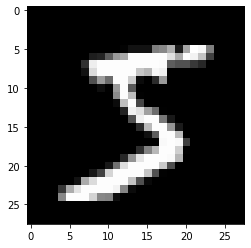

In [5]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)
print(x_train[0].shape)

# 使用imshow函数来显示图像。imshow函数的第一个参数是要显示的图像数据，它被重构成一个28x28的二维数组，使用reshape函数实现。cmap="gray"参数指定使用灰度颜色映射。
# 这段代码的效果是在屏幕上显示一个28x28像素的图像，该图像由x_train[0]中的数据重构而成。图像是使用灰度颜色值表示的，从黑色到白色共256个灰度等级。

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

注意数据需转换成tensor才能参与后续建模训练


In [6]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
# map函数被用于将x_train、y_train、x_valid和y_valid四个变量转换为torch.tensor函数的参数。map函数的作用是对传入的序列中的每个元素应用指定的函数，
# 并返回一个包含每个元素转换结果的迭代器。
# 在这种情况下，map(torch.tensor, (x_train, y_train, x_valid, y_valid))将x_train、y_train、x_valid和y_valid四个变量依次传递给torch.tensor函数，
# 并将其结果作为迭代器返回。这个迭代器包含了四个转换后的张量对象，可以用于后续的进一步处理或操作。
print(type(x_train))
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

<class 'torch.Tensor'>
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


### torch.nn.functional 很多层和函数在这里都会见到

torch.nn.functional中有很多功能，后续会常用的。那什么时候使用nn.Module，什么时候使用nn.functional呢？一般情况下，如果模型有可学习的参数，最好用nn.Module，其他情况nn.functional相对更简单一些

In [7]:
import torch.nn.functional as F

loss_func = F.cross_entropy

def model(xb):
    return xb.mm(weights) + bias

In [8]:
bs = 64
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]
weights = torch.randn([784, 10], dtype = torch.float,  requires_grad = True) 
bs = 64
bias = torch.zeros(10, requires_grad=True)

print(loss_func(model(xb), yb))

tensor(13.8578, grad_fn=<NllLossBackward0>)


### 创建一个model来更简化代码

- 必须继承nn.Module且在其构造函数中需调用nn.Module的构造函数
- 无需写反向传播函数，nn.Module能够利用autograd自动实现反向传播
- Module中的可学习参数可以通过named_parameters()或者parameters()返回迭代器

In [2]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 256)
        self.out  = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.out(x)
        return x


In [4]:
net._get_name()

'Mnist_NN'

In [3]:
net = Mnist_NN()
print(net)


Mnist_NN(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


可以打印我们定义好名字里的权重和偏置项

In [11]:
for name, parameter in net.named_parameters():
    print(name, parameter, parameter.size())

hidden1.weight Parameter containing:
tensor([[-0.0086,  0.0285,  0.0234,  ...,  0.0322,  0.0270,  0.0137],
        [-0.0142,  0.0217,  0.0071,  ...,  0.0321,  0.0066, -0.0199],
        [ 0.0085,  0.0059,  0.0356,  ...,  0.0028,  0.0104,  0.0309],
        ...,
        [ 0.0156,  0.0023,  0.0260,  ...,  0.0107, -0.0262,  0.0189],
        [-0.0072,  0.0102, -0.0279,  ...,  0.0108,  0.0278, -0.0350],
        [-0.0337, -0.0200,  0.0301,  ...,  0.0269,  0.0293, -0.0004]],
       requires_grad=True) torch.Size([128, 784])
hidden1.bias Parameter containing:
tensor([ 0.0047,  0.0238, -0.0293, -0.0175,  0.0072, -0.0227, -0.0113, -0.0150,
        -0.0210,  0.0164, -0.0117,  0.0247, -0.0141,  0.0338, -0.0306,  0.0311,
         0.0005, -0.0191,  0.0097,  0.0034, -0.0015,  0.0207,  0.0260, -0.0152,
         0.0320,  0.0341,  0.0173,  0.0013,  0.0195, -0.0204,  0.0083, -0.0328,
        -0.0016, -0.0294,  0.0159, -0.0257, -0.0278,  0.0051,  0.0342, -0.0083,
        -0.0039, -0.0056, -0.0250,  0.0126, 

### 使用TensorDataset和DataLoader来简化

In [12]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs * 2)

In [18]:
print(type(train_dl))

<class 'torch.utils.data.dataloader.DataLoader'>


In [13]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

- 一般在训练模型时加上model.train()，这样会正常使用Batch Normalization和 Dropout
- 测试的时候一般选择model.eval()，这样就不会使用Batch Normalization和 Dropout

In [14]:
import numpy as np

def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        # 后面需要在验证集上面进行计算loss，同时不想让这个计算中计算梯度对后面的训练产生影响
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('当前step:'+str(step), '验证集损失：'+str(val_loss))

In [15]:
from torch import optim
def get_model():
    model = Mnist_NN()
    return model, optim.SGD(model.parameters(), lr=0.001)

In [16]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

### 三行搞定！

In [17]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, train_dl, valid_dl)

当前step:0 验证集损失：2.279128847503662
当前step:1 验证集损失：2.2494867935180665
当前step:2 验证集损失：2.2040577396392824
当前step:3 验证集损失：2.129009489822388
当前step:4 验证集损失：2.0034153610229493
当前step:5 验证集损失：1.805879399871826
当前step:6 验证集损失：1.5462325132369996
当前step:7 验证集损失：1.2857624677658082
当前step:8 验证集损失：1.0738435333251952
当前step:9 验证集损失：0.914775092792511
当前step:10 验证集损失：0.7968136585235596
当前step:11 验证集损失：0.7076095352172852
当前step:12 验证集损失：0.64020578956604
当前step:13 验证集损失：0.5882641596794128
当前step:14 验证集损失：0.548335736656189
当前step:15 验证集损失：0.515262677192688
当前step:16 验证集损失：0.48860035152435305
当前step:17 验证集损失：0.46697572021484374
当前step:18 验证集损失：0.4488448283672333
当前step:19 验证集损失：0.43313484816551207
当前step:20 验证集损失：0.4198346958875656
当前step:21 验证集损失：0.40867107026576993
当前step:22 验证集损失：0.3981704381942749
当前step:23 验证集损失：0.3894855699539185
当前step:24 验证集损失：0.38122034640312197
